In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys

name_sweat16 = 'Mahnmook'

# tweets_data_path = "C:\\Users\\BB\\Desktop\\social_net\\sweat16\\followers\\sweat16_" + name_sweat16 + "Sweat16_followers.json"
tweets_data_path = "C:\\Users\\BB\\Desktop\\social_net\\sweat16\\followers\\sweat16_MahnmookSweat16_followers.json"

tweets_data = []
tweets_file = open(tweets_data_path, "r")
count = 0
for line in tweets_file:
    try:
        if (line == '\n'):      # skip empty lines
            continue
        count = count + 1
        tweet = json.loads(line)
        tweets_data.append(tweet)
        if count%100 == 0:
            sys.stdout.write('.')
        if count%7000 == 0:
            sys.stdout.write('\n')
    except Exception as e:
        print(e)
        continue
print(f"\n{count} tweets read.")

..............................
3086 tweets read.


In [3]:
tweets = pd.DataFrame()

In [4]:
tweets['lang_name'] = list(map(lambda tweet: tweet.get('name', None), tweets_data))
tweets['lang_screen_name'] = list(map(lambda tweet: tweet.get('screen_name', None), tweets_data))

from textblob import TextBlob
from langdetect import detect

for i in range(count):
    if len(tweets['lang_name'][i]) > 3:
        try:
            tweets['lang_name'][i] = TextBlob(tweets['lang_name'][i]).detect_language()
        except:
            tweets['lang_name'][i] = tweets['lang_name'][i]
    else :
        tweets['lang_name'][i] = tweets['lang_name'][i]

    tweets['lang_screen_name'][i] = TextBlob(tweets['lang_screen_name'][i]).detect_language()
    if (i+1)%10 == 0:
        sys.stdout.write('.')
    if (i+1)%200 == 0:
        sys.stdout.write('\n')
print(f"$")

....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
........$


In [5]:
import datetime
from email.utils import parsedate_tz

def to_datetime(datestring):
    time_tuple = parsedate_tz(datestring.strip())
    dt = datetime.datetime(*time_tuple[:6])
    return dt - datetime.timedelta(seconds=time_tuple[-1])

##tweets['created_at'] = list(map(lambda tweet: to_datetime(tweet.get('created_at', None)), tweets_data))
tweets['account_age'] = list(map(lambda tweet: datetime.datetime.now() - to_datetime(tweet.get('created_at', None)), tweets_data))
tweets['account_year'] = tweets['account_age'].apply(lambda tweet: 0 if tweet < datetime.timedelta(days=365)
                                                      else 1 if tweet < datetime.timedelta(days=365*2)
                                                      else 2 if tweet < datetime.timedelta(days=365*3)
                                                      else 3 if tweet < datetime.timedelta(days=365*4)
                                                      else 4 if tweet < datetime.timedelta(days=365*5)
                                                      else 5 if tweet < datetime.timedelta(days=365*6)
                                                      else 6 if tweet < datetime.timedelta(days=365*7)
                                                      else 7 if tweet < datetime.timedelta(days=365*8)
                                                      else "8++")

In [6]:
tweets['lang'] = list(map(lambda tweet: tweet.get('lang', None), tweets_data))
tweets['location'] = list(map(lambda tweet: tweet.get('location', None), tweets_data))

##tweets['description'] = list(map(lambda tweet: tweet.get('description', None), tweets_data))
tweets['num_char_description'] = list(map(lambda tweet: len(tweet.get('description', None)), tweets_data))
tweets['description_length'] = tweets['num_char_description'].apply(lambda tweet: "0" if tweet == 0 
                                                      else "1-30" if tweet < 31
                                                      else "31-60" if tweet < 61
                                                      else "61-90" if tweet < 91
                                                      else "91-120" if tweet < 121
                                                      else "120++")

tweets['followers_count'] = list(map(lambda tweet: tweet.get('followers_count', 0), tweets_data))
tweets['g_followers_count'] = tweets['followers_count'].apply(lambda tweet: "0" if tweet == 0 
                                                      else "1-50" if tweet < 51
                                                      else "51-100" if tweet < 101
                                                      else "101-150" if tweet < 151
                                                      else "151-200" if tweet < 201
                                                      else "201-250" if tweet < 251
                                                      else "251-300" if tweet < 301
                                                      else "300++")

tweets['friends_count'] = list(map(lambda tweet: tweet.get('friends_count', 0), tweets_data))
tweets['g_friends_count'] = tweets['friends_count'].apply(lambda tweet: "1-200" if tweet < 201
                                                      else "201-400" if tweet < 301
                                                      else "401-600" if tweet < 601
                                                      else "601-800" if tweet < 801
                                                      else "801-1000" if tweet < 1001
                                                      else "1000++")

tweets['favourites_count'] = list(map(lambda tweet: tweet.get('favourites_count', 0), tweets_data))
tweets['g_favourites_count'] = tweets['favourites_count'].apply(lambda tweet: "0" if tweet == 0
                                                      else "1-500" if tweet < 501
                                                      else "501-1000" if tweet < 1001
                                                      else "1001-1500" if tweet < 1501
                                                      else "1501-2000" if tweet < 2001
                                                      else "2001-2500" if tweet < 2501
                                                      else "2501-3000" if tweet < 3000
                                                      else "3000++")

##tweets['profile_location'] = list(map(lambda tweet: tweet.get('profile_location', "None"), tweets_data))
tweets['has_profile_location'] = list(map(lambda tweet: "True" if tweet.get('profile_location', None) != None else "False", tweets_data))
##tweets['url'] = list(map(lambda tweet: tweet.get('url', None), tweets_data))
tweets['has_url'] = list(map(lambda tweet: "True" if tweet.get('url', None) != None else "False", tweets_data))

tweets['protected'] = list(map(lambda tweet: tweet.get('protected', None), tweets_data))
tweets['default_profile'] = list(map(lambda tweet: tweet.get('default_profile', None), tweets_data))
tweets['default_profile_image'] = list(map(lambda tweet: tweet.get('default_profile_image', None), tweets_data))
tweets['has_extended_profile'] = list(map(lambda tweet: tweet.get('has_extended_profile', None), tweets_data))

tweets['profile_background_color'] = list(map(lambda tweet: tweet.get('profile_background_color', None), tweets_data))
tweets['profile_link_color'] = list(map(lambda tweet: tweet.get('profile_link_color', None), tweets_data))
tweets['profile_sidebar_border_color'] = list(map(lambda tweet: tweet.get('profile_sidebar_border_color', None), tweets_data))
tweets['profile_sidebar_fill_color'] = list(map(lambda tweet: tweet.get('profile_sidebar_fill_color', None), tweets_data))
tweets['profile_text_color'] = list(map(lambda tweet: tweet.get('profile_text_color', None), tweets_data))

# print(tweets['g_favourites_count'].head(50))

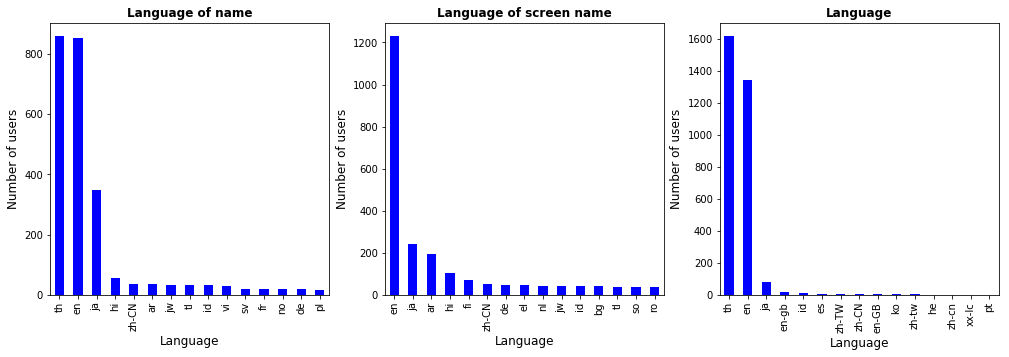

In [7]:
%matplotlib inline

tweets_by_lang_name = tweets['lang_name'].value_counts()
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(17,5))
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('Language', fontsize=12)
ax1.set_ylabel('Number of users' , fontsize=12)
ax1.set_title('Language of name', fontsize=12, fontweight='bold')
tweets_by_lang_name[:15].plot(ax=ax1, kind='bar', color='blue')

tweets_by_lang_screen_name = tweets['lang_screen_name'].value_counts()
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_xlabel('Language', fontsize=12)
ax2.set_ylabel('Number of users' , fontsize=12)
ax2.set_title('Language of screen name', fontsize=12, fontweight='bold')
tweets_by_lang_screen_name[:15].plot(ax=ax2, kind='bar', color='blue')

tweets_by_lang = tweets['lang'].value_counts()
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax3.set_xlabel('Language', fontsize=12)
ax3.set_ylabel('Number of users' , fontsize=12)
ax3.set_title('Language', fontsize=12, fontweight='bold')
tweets_by_lang[:15].plot(ax=ax3, kind='bar', color='blue')

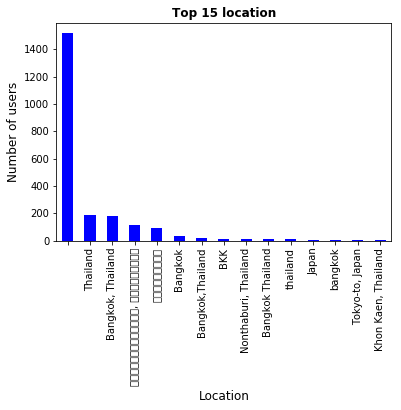

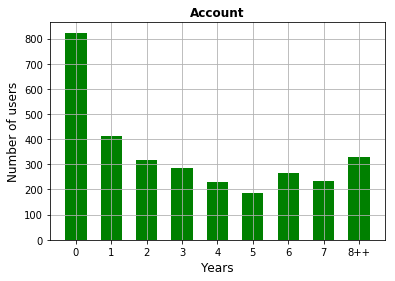

In [8]:
%matplotlib inline

tweets_by_location = tweets['location'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Number of users' , fontsize=12)
ax.set_title('Top 15 location', fontsize=12, fontweight='bold')
tweets_by_location[:15].plot(ax=ax, kind='bar', color='blue')

tweets_by_account_year = tweets['account_year'].value_counts()
keywords = [0,1,2,3,4,5,6,7,"8++"]
tweets_by_account_age = [tweets['account_year'].apply(lambda tweet: 0 if tweet == keywords[0] else "None").value_counts()[1],
                        tweets['account_year'].apply(lambda tweet: 1 if tweet == keywords[1] else "None").value_counts()[1],
                        tweets['account_year'].apply(lambda tweet: 2 if tweet == keywords[2] else "None").value_counts()[1],
                        tweets['account_year'].apply(lambda tweet: 3 if tweet == keywords[3] else "None").value_counts()[1],
                        tweets['account_year'].apply(lambda tweet: 4 if tweet == keywords[4] else "None").value_counts()[1],
                        tweets['account_year'].apply(lambda tweet: 5 if tweet == keywords[5] else "None").value_counts()[1],
                        tweets['account_year'].apply(lambda tweet: 6 if tweet == keywords[6] else "None").value_counts()[1],
                        tweets['account_year'].apply(lambda tweet: 7 if tweet == keywords[7] else "None").value_counts()[1],
                        tweets['account_year'].apply(lambda tweet: 8 if tweet == keywords[8] else "None").value_counts()[1]]

x_pos = list(range(len(keywords)))
width = 0.6
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_account_age, width, alpha=1, color='g')

ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Number of users', fontsize=12)
ax.set_title('Account', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(keywords)
plt.grid()

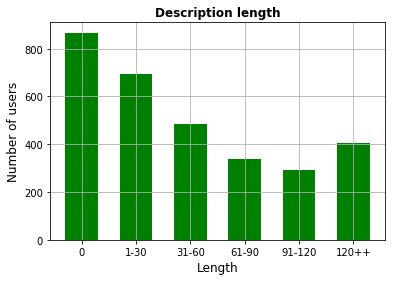

In [9]:
%matplotlib inline

tweets_by_g_description_length = tweets['description_length'].value_counts()
keywords = ["0","1-30","31-60","61-90","91-120","120++"]
tweets_by_description_length = \
[tweets['description_length'].apply(lambda tweet: keywords[0] if tweet == keywords[0] else "None").value_counts()[1],
 tweets['description_length'].apply(lambda tweet: keywords[1] if tweet == keywords[1] else "None").value_counts()[1],
 tweets['description_length'].apply(lambda tweet: keywords[2] if tweet == keywords[2] else "None").value_counts()[1],
 tweets['description_length'].apply(lambda tweet: keywords[3] if tweet == keywords[3] else "None").value_counts()[1],
 tweets['description_length'].apply(lambda tweet: keywords[4] if tweet == keywords[4] else "None").value_counts()[1],
 tweets['description_length'].apply(lambda tweet: keywords[5] if tweet == keywords[5] else "None").value_counts()[1]]

x_pos = list(range(len(keywords)))
width = 0.6
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_description_length, width, alpha=1, color='g')

ax.set_xlabel('Length', fontsize=12)
ax.set_ylabel('Number of users', fontsize=12)
ax.set_title('Description length', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(keywords)
plt.grid()

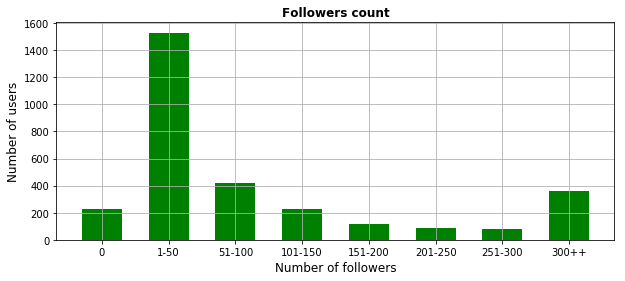

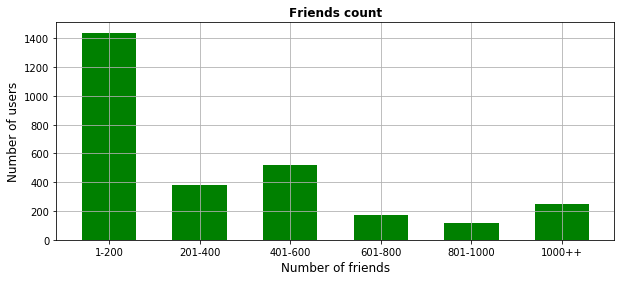

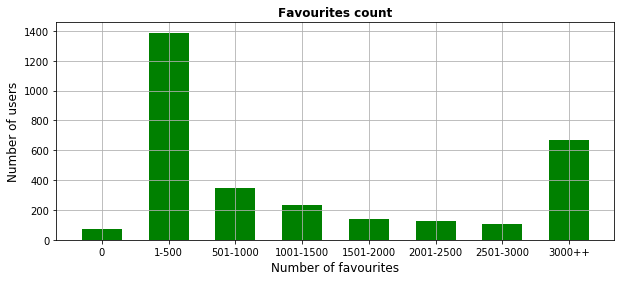

In [10]:
%matplotlib inline

w_plot = 10
h_plot = 4

tweets_by_g_followers_count = tweets['g_followers_count'].value_counts()
tweets_by_g_friends_count = tweets['g_friends_count'].value_counts()
tweets_by_g_favourites_count = tweets['g_favourites_count'].value_counts()

keywords = ["0","1-50","51-100","101-150","151-200","201-250","251-300","300++"]
tweets_by_followers_count = \
[tweets['g_followers_count'].apply(lambda tweet: keywords[0] if tweet == keywords[0] else "None").value_counts()[1],
 tweets['g_followers_count'].apply(lambda tweet: keywords[1] if tweet == keywords[1] else "None").value_counts()[1],
 tweets['g_followers_count'].apply(lambda tweet: keywords[2] if tweet == keywords[2] else "None").value_counts()[1],
 tweets['g_followers_count'].apply(lambda tweet: keywords[3] if tweet == keywords[3] else "None").value_counts()[1],
 tweets['g_followers_count'].apply(lambda tweet: keywords[4] if tweet == keywords[4] else "None").value_counts()[1],
 tweets['g_followers_count'].apply(lambda tweet: keywords[5] if tweet == keywords[5] else "None").value_counts()[1],
 tweets['g_followers_count'].apply(lambda tweet: keywords[6] if tweet == keywords[6] else "None").value_counts()[1],
 tweets['g_followers_count'].apply(lambda tweet: keywords[7] if tweet == keywords[7] else "None").value_counts()[1]]

x_pos = list(range(len(keywords)))
width = 0.6
fig, ax = plt.subplots(figsize=(w_plot,h_plot))
plt.bar(x_pos, tweets_by_followers_count, width, alpha=1, color='g')

ax.set_xlabel('Number of followers', fontsize=12)
ax.set_ylabel('Number of users', fontsize=12)
ax.set_title('Followers count', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(keywords)
plt.grid()

keywords = ["1-200","201-400","401-600","601-800","801-1000","1000++"]
tweets_by_friends_count = \
[tweets['g_friends_count'].apply(lambda tweet: keywords[0] if tweet == keywords[0] else "None").value_counts()[1],
 tweets['g_friends_count'].apply(lambda tweet: keywords[1] if tweet == keywords[1] else "None").value_counts()[1],
 tweets['g_friends_count'].apply(lambda tweet: keywords[2] if tweet == keywords[2] else "None").value_counts()[1],
 tweets['g_friends_count'].apply(lambda tweet: keywords[3] if tweet == keywords[3] else "None").value_counts()[1],
 tweets['g_friends_count'].apply(lambda tweet: keywords[4] if tweet == keywords[4] else "None").value_counts()[1],
 tweets['g_friends_count'].apply(lambda tweet: keywords[5] if tweet == keywords[5] else "None").value_counts()[1]]

x_pos = list(range(len(keywords)))
width = 0.6
fig, ax = plt.subplots(figsize=(w_plot,h_plot))
plt.bar(x_pos, tweets_by_friends_count, width, alpha=1, color='g')

ax.set_xlabel('Number of friends', fontsize=12)
ax.set_ylabel('Number of users', fontsize=12)
ax.set_title('Friends count', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(keywords)
plt.grid()

keywords = ["0","1-500","501-1000","1001-1500","1501-2000","2001-2500","2501-3000","3000++"]
tweets_by_favourites_count = \
[tweets['g_favourites_count'].apply(lambda tweet: keywords[0] if tweet == keywords[0] else "None").value_counts()[1],
 tweets['g_favourites_count'].apply(lambda tweet: keywords[1] if tweet == keywords[1] else "None").value_counts()[1],
 tweets['g_favourites_count'].apply(lambda tweet: keywords[2] if tweet == keywords[2] else "None").value_counts()[1],
 tweets['g_favourites_count'].apply(lambda tweet: keywords[3] if tweet == keywords[3] else "None").value_counts()[1],
 tweets['g_favourites_count'].apply(lambda tweet: keywords[4] if tweet == keywords[4] else "None").value_counts()[1],
 tweets['g_favourites_count'].apply(lambda tweet: keywords[5] if tweet == keywords[5] else "None").value_counts()[1],
 tweets['g_favourites_count'].apply(lambda tweet: keywords[6] if tweet == keywords[6] else "None").value_counts()[1],
 tweets['g_favourites_count'].apply(lambda tweet: keywords[7] if tweet == keywords[7] else "None").value_counts()[1]]

x_pos = list(range(len(keywords)))
width = 0.6
fig, ax = plt.subplots(figsize=(w_plot,h_plot))
plt.bar(x_pos, tweets_by_favourites_count, width, alpha=1, color='g')

ax.set_xlabel('Number of favourites', fontsize=12)
ax.set_ylabel('Number of users', fontsize=12)
ax.set_title('Favourites count', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(keywords)
plt.grid()

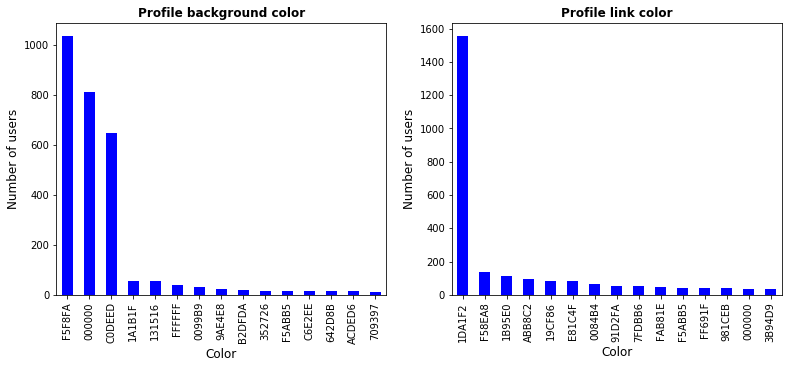

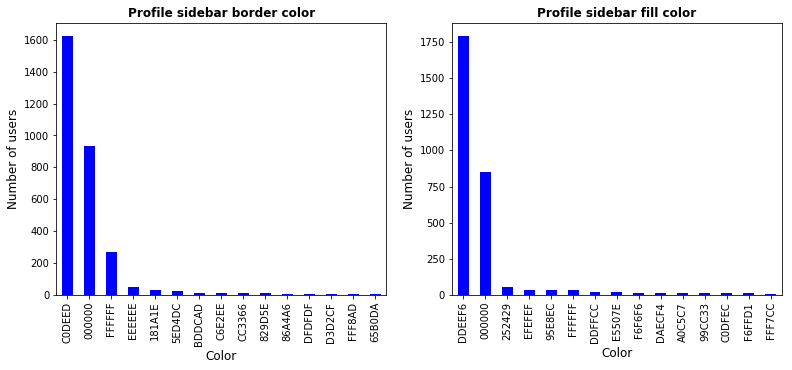

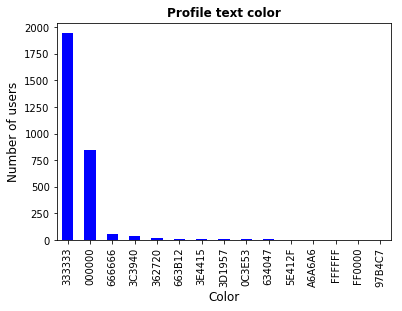

In [11]:
%matplotlib inline

tweets_by_profile_background_color = tweets['profile_background_color'].value_counts()
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('Color', fontsize=12)
ax1.set_ylabel('Number of users' , fontsize=12)
ax1.set_title('Profile background color', fontsize=12, fontweight='bold')
tweets_by_profile_background_color[:15].plot(ax=ax1, kind='bar', color='blue')

tweets_by_profile_link_color = tweets['profile_link_color'].value_counts()
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_xlabel('Color', fontsize=12)
ax2.set_ylabel('Number of users' , fontsize=12)
ax2.set_title('Profile link color', fontsize=12, fontweight='bold')
tweets_by_profile_link_color[:15].plot(ax=ax2, kind='bar', color='blue')

tweets_by_profile_sidebar_border_color = tweets['profile_sidebar_border_color'].value_counts()
fig, (ax3,ax4) = plt.subplots(ncols=2,figsize=(13,5))
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax3.set_xlabel('Color', fontsize=12)
ax3.set_ylabel('Number of users' , fontsize=12)
ax3.set_title('Profile sidebar border color', fontsize=12, fontweight='bold')
tweets_by_profile_sidebar_border_color[:15].plot(ax=ax3, kind='bar', color='blue')

tweets_by_profile_sidebar_fill_color = tweets['profile_sidebar_fill_color'].value_counts()
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)
ax4.set_xlabel('Color', fontsize=12)
ax4.set_ylabel('Number of users' , fontsize=12)
ax4.set_title('Profile sidebar fill color', fontsize=12, fontweight='bold')
tweets_by_profile_sidebar_fill_color[:15].plot(ax=ax4, kind='bar', color='blue')

tweets_by_profile_text_color = tweets['profile_text_color'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Color', fontsize=12)
ax.set_ylabel('Number of users' , fontsize=12)
ax.set_title('Profile text color', fontsize=12, fontweight='bold')
tweets_by_profile_text_color[:15].plot(ax=ax, kind='bar', color='blue')

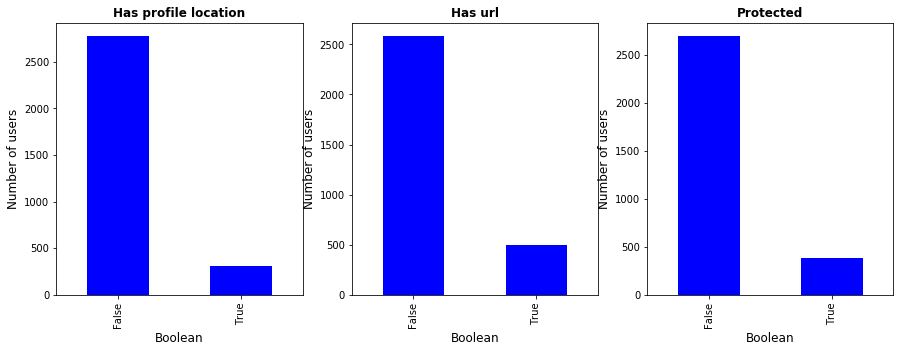

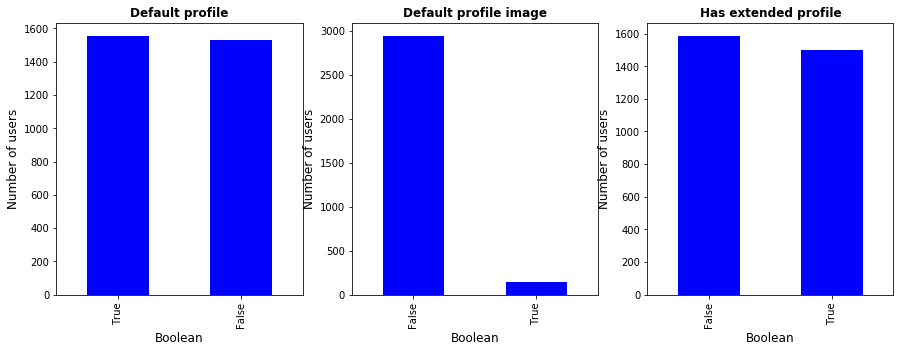

In [12]:
%matplotlib inline

tweets_by_has_profile_location = tweets['has_profile_location'].value_counts()
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(15,5))
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('Boolean', fontsize=12)
ax1.set_ylabel('Number of users' , fontsize=12)
ax1.set_title('Has profile location', fontsize=12, fontweight='bold')
tweets_by_has_profile_location[:15].plot(ax=ax1, kind='bar', color='blue')


tweets_by_has_url = tweets['has_url'].value_counts()
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_xlabel('Boolean', fontsize=12)
ax2.set_ylabel('Number of users' , fontsize=12)
ax2.set_title('Has url', fontsize=12, fontweight='bold')
tweets_by_has_url[:15].plot(ax=ax2, kind='bar', color='blue')

tweets_by_protected = tweets['protected'].value_counts()
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax3.set_xlabel('Boolean', fontsize=12)
ax3.set_ylabel('Number of users' , fontsize=12)
ax3.set_title('Protected', fontsize=12, fontweight='bold')
tweets_by_protected[:15].plot(ax=ax3, kind='bar', color='blue')

tweets_by_default_profile = tweets['default_profile'].value_counts()
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(15,5))
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('Boolean', fontsize=12)
ax1.set_ylabel('Number of users' , fontsize=12)
ax1.set_title('Default profile', fontsize=12, fontweight='bold')
tweets_by_default_profile[:15].plot(ax=ax1, kind='bar', color='blue')

tweets_by_default_profile_image = tweets['default_profile_image'].value_counts()
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_xlabel('Boolean', fontsize=12)
ax2.set_ylabel('Number of users' , fontsize=12)
ax2.set_title('Default profile image', fontsize=12, fontweight='bold')
tweets_by_default_profile_image[:15].plot(ax=ax2, kind='bar', color='blue')

tweets_by_has_extended_profile = tweets['has_extended_profile'].value_counts()
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax3.set_xlabel('Boolean', fontsize=12)
ax3.set_ylabel('Number of users' , fontsize=12)
ax3.set_title('Has extended profile', fontsize=12, fontweight='bold')
tweets_by_has_extended_profile[:15].plot(ax=ax3, kind='bar', color='blue')

In [13]:
def to_csv(tweets, name, label):
    temp = tweets.name
    tweets.name = 'count'
    tweets.to_csv('csv/' + name + '/filter_followers_by_' + temp + '.csv', index=True, header=True, index_label=label)
    tweets.name = temp

In [14]:
to_csv(tweets_by_lang, name_sweat16, 'lang')

to_csv(tweets_by_lang_name, name_sweat16, 'lang') #
to_csv(tweets_by_lang_screen_name, name_sweat16, 'lang') #

to_csv(tweets_by_location, name_sweat16, 'location') #

to_csv(tweets_by_account_year, name_sweat16, 'year') #
to_csv(tweets_by_g_description_length, name_sweat16, 'length') #

to_csv(tweets_by_g_followers_count, name_sweat16, 'followers') #
to_csv(tweets_by_g_friends_count, name_sweat16, 'friends') #
to_csv(tweets_by_g_favourites_count, name_sweat16, 'favourites')

to_csv(tweets_by_profile_background_color, name_sweat16, 'color')
to_csv(tweets_by_profile_link_color, name_sweat16, 'color')
to_csv(tweets_by_profile_sidebar_border_color, name_sweat16, 'color')
to_csv(tweets_by_profile_sidebar_fill_color, name_sweat16, 'color')
to_csv(tweets_by_profile_text_color, name_sweat16, 'color')

to_csv(tweets_by_has_profile_location, name_sweat16, 'boolean') #
to_csv(tweets_by_has_url, name_sweat16, 'boolean') #
to_csv(tweets_by_protected, name_sweat16, 'boolean') #
to_csv(tweets_by_default_profile, name_sweat16, 'boolean')
to_csv(tweets_by_default_profile_image, name_sweat16, 'boolean')
to_csv(tweets_by_has_extended_profile, name_sweat16, 'boolean')